In [4]:
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import graphviz
import itertools
#from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from typing import List, Union, Any, Tuple, Dict

# Project path
ppath = sys.path[0] + '/../'

In [29]:
df = pd.read_csv(os.path.join(ppath, 'data', 'uciml_pima-indians-diabetes-database', 'diabetes.csv'))
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [74]:
cols = ['Glucose', 'BMI', 'Age']
gpt_bins = [[-1, 140, 200],[-1, 18.5, 25, 30, 68],[-1, 18, 35, 50, 65, 100],[-1, 25, 40, 55, 75, 100],]
binning_strategies = {
    'Glucose': [
        [-1, 100, 200],
        [-1, 50, 100, 150, 200],
        [-1, 105, 130, 1000],
        [-1, 95, 109, 125, 147, 1000],
        [-1, 140, 200],
        ],
    'BMI': [
        [-1, 34, 68],
        [-1, 17, 34, 41, 68],
        [-1, 29, 35, 68],
        [-1, 26, 30, 34, 38, 68],
        [-1, 18.5, 25, 30, 68],
        ],
    'Age': [
        [-1, 33, 66, 100],
        [-1, 25, 50, 75, 100],
        [-1, 23, 27, 33, 43, 100],
        [-1, 18, 35, 50, 65, 100],
        [-1, 25, 40, 55, 75, 100],
        ],
}
strategy_combos = list(itertools.product(*binning_strategies.values()))

In [75]:
x0 = []
x1 = []
x2 = []
x3 = []
results = []
for strategy in strategy_combos:
    # load data
    df = pd.read_csv(os.path.join(ppath, 'data', 'uciml_pima-indians-diabetes-database', 'diabetes.csv'))
    # bin fixed columns
    df['DiabetesPedigreeFunction.binned'] = pd.cut(df['DiabetesPedigreeFunction'], bins=[-1, 0.5, 1, 100], labels=[0.5, 1, 100])
    df['DiabetesPedigreeFunction.binned'] = df['DiabetesPedigreeFunction.binned'].astype('float64')
    df['Pregnancies.binned'] = pd.cut(df['Pregnancies'], bins=[-1, 2, 100], labels=[0, 1])
    df['Pregnancies.binned'] = df['Pregnancies.binned'].astype('int64')
    df['Insulin.binned'] = pd.cut(df['Insulin'], bins=[-1, 30, 120, 1000], labels=[30, 120, 1000])
    df['Insulin.binned'] = df['Insulin.binned'].astype('int64')
    df['BloodPressure.binned'] = pd.cut(df['BloodPressure'], bins=[-1, 60, 90, 100, 1000], labels=[60, 90, 100, 1000])
    df['BloodPressure.binned'] = df['BloodPressure.binned'].astype('int64')
    df['SkinThickness.binned'] = pd.cut(df['SkinThickness'], bins=[-1, 20, 40, 60, 80, 100], labels=[20, 40, 60, 80, 100])
    df['SkinThickness.binned'] = df['SkinThickness.binned'].astype('int64')
    # bin variable columns
    gpt_bin_count = 0
    for i in range(len(cols)):
        col = cols[i]
        bins = strategy[i]
        df[col + '.binned'] = pd.cut(df[col], bins=bins, labels=bins[1:])
        df[col + '.binned'] = df[col + '.binned'].astype('float64')
        if bins in gpt_bins: gpt_bin_count += 1
    # split data
    X = df[['Glucose.binned', 'Pregnancies.binned', 'Insulin.binned', 'BMI.binned', 'Age.binned',
            'BloodPressure.binned', 'DiabetesPedigreeFunction.binned', 'SkinThickness.binned']]
    y = df['Outcome']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    clf = DecisionTreeClassifier(random_state=0,max_depth=3).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    #print("Strategy:", strategy)
    print("Accuracy:", accuracy, "Strategy:", strategy)
    #print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    #print("Classification report:\n", classification_report(y_test, y_pred))
    results.append(accuracy)
    if gpt_bin_count == 0:
        x0.append(accuracy)
    elif gpt_bin_count == 1:
        x1.append(accuracy)
    elif gpt_bin_count == 2:
        x2.append(accuracy)
    elif gpt_bin_count == 3:
        x3.append(accuracy)
print("Number of results:", len(results))

Accuracy: 0.6623376623376623 Strategy: ([-1, 100, 200], [-1, 34, 68], [-1, 33, 66, 100])
Accuracy: 0.6493506493506493 Strategy: ([-1, 100, 200], [-1, 34, 68], [-1, 25, 50, 75, 100])
Accuracy: 0.6558441558441559 Strategy: ([-1, 100, 200], [-1, 34, 68], [-1, 23, 27, 33, 43, 100])
Accuracy: 0.6363636363636364 Strategy: ([-1, 100, 200], [-1, 34, 68], [-1, 18, 35, 50, 65, 100])
Accuracy: 0.6493506493506493 Strategy: ([-1, 100, 200], [-1, 34, 68], [-1, 25, 40, 55, 75, 100])
Accuracy: 0.6753246753246753 Strategy: ([-1, 100, 200], [-1, 17, 34, 41, 68], [-1, 33, 66, 100])
Accuracy: 0.6493506493506493 Strategy: ([-1, 100, 200], [-1, 17, 34, 41, 68], [-1, 25, 50, 75, 100])
Accuracy: 0.6623376623376623 Strategy: ([-1, 100, 200], [-1, 17, 34, 41, 68], [-1, 23, 27, 33, 43, 100])
Accuracy: 0.6493506493506493 Strategy: ([-1, 100, 200], [-1, 17, 34, 41, 68], [-1, 18, 35, 50, 65, 100])
Accuracy: 0.6493506493506493 Strategy: ([-1, 100, 200], [-1, 17, 34, 41, 68], [-1, 25, 40, 55, 75, 100])
Accuracy: 0.66

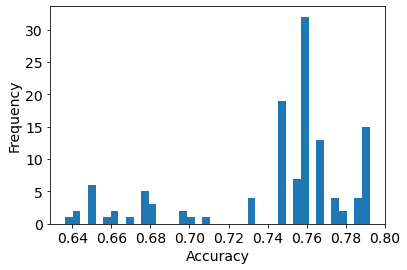

In [68]:
# create a histogram of the accuracy scores
plt.figure()
plt.hist(results, bins=40)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Accuracy', size=14)
plt.ylabel('Frequency', size=14)
#plt.title('Decision tree accuracy', size=18)
plt.savefig(os.path.join(ppath, 'figs', 'pima-histogram.png'), dpi=300, bbox_inches="tight")
plt.show()

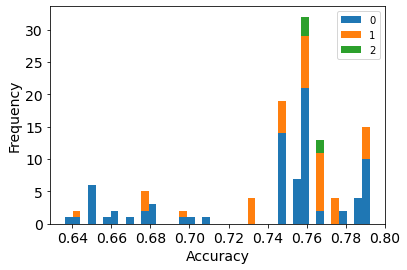

In [77]:
# create a histogram of the accuracy scores
plt.figure()
plt.hist([x0, x1, x2, x3], bins=40, stacked=True, label=['0', '1', '2', '3'])
plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Accuracy', size=14)
plt.ylabel('Frequency', size=14)
#plt.title('Decision tree accuracy', size=18)
plt.savefig(os.path.join(ppath, 'figs', 'pima-histogram-stacked.png'), dpi=300, bbox_inches="tight")
plt.show()